# Can goals scored in football games be modelled by the Poisson process?

**date**
: 2021-04-11

We begin the analysis by importing the support classes and declaring local variables that will be used throughout the report.

In [1]:
from src.data import Data
from src.poisson_process import PoissonProcess

In [2]:
X = Data.load_goals_per_game()
X_chi_sq = Data.load_goals_per_game_chi_sq()
W = Data.load_waiting_times_goals()
W_chi_sq = Data.load_waiting_time_chi_sq()
rate = Data.load_global_goal_times()

## 1. About

The source data was taken from [FootyStats](https://footystats.org/stats) and is concerned with the English Premier League 2018/19 season.
The source data can be found in the data/in folder.

The processed data used in this modelling can be found in the data/out folder.
Notebooks numbered **1.X** in this folder details the scripts written to process the source data into a usable format.

## 2. Methodology

Whether the number of goals scored and the waiting time between goals can be modelled by a **Poisson process** is analysed in three ways.

In (3.1), we examine the plausbility that the number of goals per game can be modelled by a Poisson distribution.
We compare a bar chart of the number of goals sored per game in the 2018/19 EPL season with that of the probability mass function of **Poisson**($\overline{X}$), where $\overline{X}$ is the average number of goals per game.
We also perform a chi-squared goodness-of-fit test on the sample.

In (3.2), we analyse if the waiting time between goals (if the games were played in series) can possibly be modelled by an exponential distibution. 
We compare a histogram of the waiting time between goals in EPL season with that of the probability density function of $M(\lambda)$, where $\lambda$ the rate of goals scored in unit minutes.
We again perform a **chi-squared goodness-of-fit** test on the sample.

Finally, in (3.3) rate of goals scored over the football season to see if it remained approximately constant over the period.

## 3. Results

### 3.1 Number of goals scored per game

Let $X$ represent the number of goals scored per game.

A summary table of the number of goals per game is shown below.

In [3]:
X["total_goal_count"].describe()

count    380.000000
mean       2.821053
std        1.601312
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: total_goal_count, dtype: float64

If it is plausible that $X$ can be modelled by a Poisson distribution, we would expect the sample mean $\overline{X}$ to be approximately equal to the sample variance $S^{2}$.
It can see that $\overline{X} \simeq 2.8$ and $S_{X}^{2} \simeq 1.6^{2} = 2.6$.
These values are close enough not to cause a concern, so a Poisson model is plausible.

A bar chart of the number of goals per game is shown below in **Figure 1**, after which we plot the probability mass function of Poisson(2.8) for help in comparison in **Figure 2**.

**Figure 1.**

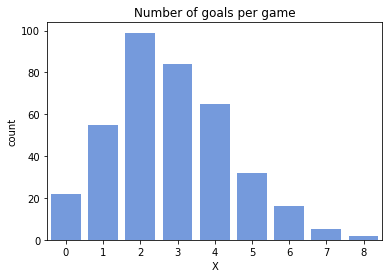

In [4]:
PoissonProcess.plot_x(X["total_goal_count"])

**Figure 2.**

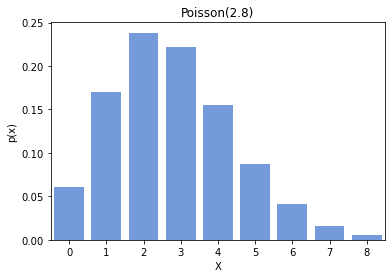

In [5]:
PoissonProcess.plot_Poisson(2.8)

The two plots are very similar.
Both are unimodal with a peak at $X=2$ and are slightly right skew.
The most obvious difference between the two are the heights of bars $X=1$ and $X=3$ are more pronounced in the **Poisson**(2.8) p.m.f compared to the plot of the sample.

Finally in this subsection we perform a chi-squared goodness-of-fit test.
Let the null hypothesis be that the number of goals per game can be modelled by a **Poisson**(2.8) distribution.

A table of results for the chi-squared goodness-of-fit test is shown below.
Note that games where there were 7 or more goals scored are combined into a single category (7+) to ensure that all expected values are greater than or equal to 5.

In [6]:
X_chi_sq

,X,Observed,Pr,Expected,chi-sq contribution
0,0,22,0.059543,22.626428,0.017343
1,1,55,0.167975,63.830345,1.221598
2,2,99,0.236933,90.034382,0.892796
3,3,84,0.222800,84.663910,0.005206
4,4,65,0.157132,59.710337,0.468605
5,5,32,0.088656,33.689200,0.084698
6,6,16,0.041684,15.839835,0.001620
7,7+,7,0.025278,9.605563,0.706774


The value of the chi-squared goodness-of-fit test statistic is approximately 3.40.

In [7]:
PoissonProcess.get_chi2(X_chi_sq["chi-sq contribution"])

3.3986380370064015

There are $k=8$ categories and we estimated one parameter ($\overline{X}$), so there are 6 degrees of freedom and the appropiate null distribution is $\chi^{2}(6)$.

Taken all together, this gives us a $p$-value approximately 0.69.

In [8]:
PoissonProcess.get_p_from_chi2(chi_sq=3.899, df=6)

0.6903423382034324


Given the $p>0.1$, there is **little to no evidence** against the null hypothesis that the number of goals per game can be modelled by a **Poisson**(2.8) distribution.

We conclude that it is plausible that the total number of goals scored in the EPL 2018/19 season can be modelled by a **Poisson**(2.8) distribution.

### 3.2 Waiting time between goals

A summary table of the waiting time between goals is shown below.

In [9]:
W["waiting_times"].describe()

count    1072.000000
mean       31.891791
std        30.279209
min         0.000000
25%        10.000000
50%        23.000000
75%        44.000000
max       204.000000
Name: waiting_times, dtype: float64

Let $W$ represent the number of goals scored per game.
If $W$ can be resonably modelled by an exponential distribution, we would expect the sample mean $\overline{W}$ to be approximately equal to the sample standard deviation $S_{W}$.
It can be read from the table that $\overline{W}=31.9$ and $S_{W}=30.3$.
They are close enough not to cause a concern, so an exponential model could be plausible.

A histogram of the waiting times between goals is shown below, after which we plot the probability mass function of $M(31.9)$.

**Figure 3.**

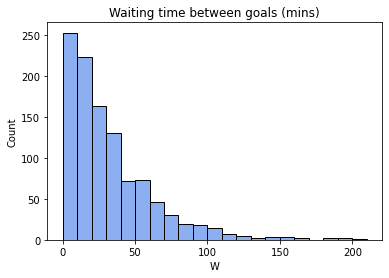

In [10]:
PoissonProcess.plot_w(W["waiting_times"])

**Figure 4.**

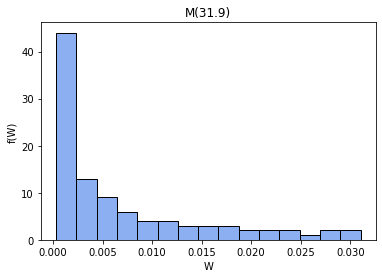

In [11]:
PoissonProcess.plot_expon(31.9)

The shape of the histogram of the sample in **Figure 3** is highly right-skew with a single mode for low values, which is what we from an exponential ditribution (shown in **Figure 4**).

Finally in this subsection we perform a chi-squared goodness-of-fit test.
Let the null hypothesis be that the waiting time between goals per game can be modelled by an $M(31.9)$ distribution.

A table of results for testing the hypothesis was constructued and is reported below.
Note that waiting times of more than 90 minutes are combined into a single category (90+) to ensure that all exprected frequenceies were $\geq$ 5.

In [12]:
W_chi_sq

,time_banding,Observed,Pr,Expected,chi-sq contribution
0,10,277,0.269160,288.539200,0.461473
1,20,213,0.196713,210.876075,0.021392
2,30,169,0.143766,154.116734,1.437298
3,40,119,0.105070,112.634720,0.359719
4,50,76,0.076789,82.317992,0.484913
5,60,65,0.056121,60.161306,0.389170
6,70,48,0.041015,43.968307,0.369688
7,80,27,0.029976,32.133810,0.820196
8,90,17,0.021907,23.484684,1.790576
9,90+,61,0.059484,63.767172,0.120081


Totalling the $\chi^{2}$-contributions yields a $\chi^{2}$-value of approximately 6.255.

In [13]:
PoissonProcess.get_chi2(W_chi_sq["chi-sq contribution"])

6.254504894912404

There are $k=10$ categories and we estimated one parameter ($\overline{W}$), so there are 8 degrees of freedom and the appropiate null distribution is $\chi^{2}(8)$.

Taken all together, this gives us a $p$-value approximately 0.62.

In [14]:
PoissonProcess.get_p_from_chi2(6.255, df=8)

0.6186918017524157


Given the $p>0.1$, there is **little to no evidence** against the null hypothesis that the waiting time between goals per game can reasonaly be modelled by a $M(31.9)$ distribution.

We conclude that it is plausible that the waiting time between goals scored in the EPL 2018/19 season can be modelled by a $M(31.9)$ distribution.

### 3.3 Rate of goals over time

We would expect the rate of goals scored to be constant throughout the season.

A scatterplot showing the global goal time (timed as if the games were played in sweries, rather than parallel) against the goal id is plotted below.

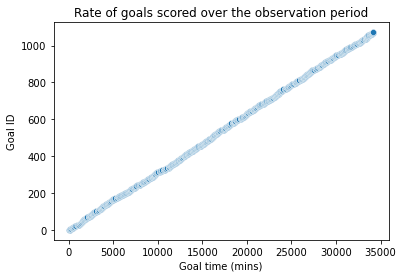

In [15]:
PoissonProcess.plot_rate(
    x=rate["global_goal_times"],
    y=rate["goal_ids"]
)

The points lie roughly along a straight line through the origin, suggesting that avarage rate of goals scored remained constant over the EPL 2018/19 season.

## 4 Discussion

The notebook provides strong evidence that the number of goals scored and the waiting time between goals can be reasonably modelled by a Poisson process.